# EDA notes
Using the clean data stored in the database, we are exploring and visualizing the data. I will then pick a couple of interesting visualizations to add to the web app.

In this notebook, we will answer two main questions to have an overview of the dataset:
- Where do the messages come from?
- What 

### 1. Import libraries and load data from database.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

from sqlalchemy.engine import create_engine

In [2]:
engine = create_engine('sqlite:///DisasterResponse.db')
df = pd.read_sql_table('data', engine)
df.head()

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.describe()

,id,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
count,26216.00000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,...,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000
mean,15224.82133,0.773650,0.170659,0.004501,0.414251,0.079493,0.050084,0.027617,0.017966,0.032804,...,0.011787,0.043904,0.278341,0.082202,0.093187,0.010757,0.093645,0.020217,0.052487,0.193584
std,8826.88914,0.435276,0.376218,0.066940,0.492602,0.270513,0.218122,0.163875,0.132831,0.178128,...,0.107927,0.204887,0.448191,0.274677,0.290700,0.103158,0.291340,0.140743,0.223011,0.395114
min,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7446.75000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15662.50000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22924.25000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30265.00000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df.columns

Index(['id', 'message', 'original', 'genre', 'related', 'request', 'offer',
       'aid_related', 'medical_help', 'medical_products', 'search_and_rescue',
       'security', 'military', 'child_alone', 'water', 'food', 'shelter',
       'clothing', 'money', 'missing_people', 'refugees', 'death', 'other_aid',
       'infrastructure_related', 'transport', 'buildings', 'electricity',
       'tools', 'hospitals', 'shops', 'aid_centers', 'other_infrastructure',
       'weather_related', 'floods', 'storm', 'fire', 'earthquake', 'cold',
       'other_weather', 'direct_report'],
      dtype='object')

<Axes: title={'center': 'Where do the messages come from?'}>

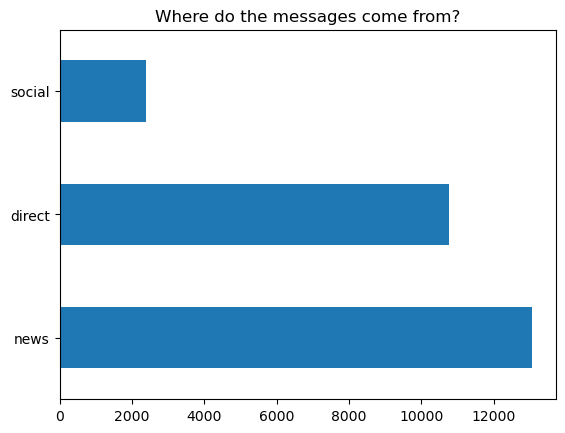

In [9]:
df['genre'].value_counts().plot(kind='barh', title='Where do the messages come from?')

In [13]:
df[['related', 'request', 'offer',
       'aid_related', 'medical_help', 'medical_products', 'search_and_rescue',
       'security', 'military', 'child_alone', 'water', 'food', 'shelter',
       'clothing', 'money', 'missing_people', 'refugees', 'death', 'other_aid',
       'infrastructure_related', 'transport', 'buildings', 'electricity',
       'tools', 'hospitals', 'shops', 'aid_centers', 'other_infrastructure',
       'weather_related', 'floods', 'storm', 'fire', 'earthquake', 'cold',
       'other_weather', 'direct_report']].apply(pd.Series.value_counts)



,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,6122,21742.0,26098.0,15356.0,24132.0,24903.0,25492.0,25745.0,25356.0,26216.0,...,25907.0,25065.0,18919.0,24061.0,23773.0,25934.0,23761.0,25686.0,24840.0,21141.0
1,19906,4474.0,118.0,10860.0,2084.0,1313.0,724.0,471.0,860.0,NaN,...,309.0,1151.0,7297.0,2155.0,2443.0,282.0,2455.0,530.0,1376.0,5075.0
2,188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
categories_col = df.iloc[:,-36:].columns
df[categories_col] = df[categories_col].astype(float)

In [115]:
# tokenise the dataframe and redo the word cloud plots
#libraries for the tokenize function
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


def tokenize(text):
    text = re.sub(r"[^a-zA-Z0-9]", " ", text) #removing all punctuations
    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    
    clean_tokens = []
    for tok in tokens:
        
        clean_tok = lemmatizer.lemmatize(tok).lower().strip()
        clean_tokens.append(clean_tok)
        #clean_tokens = [w for w in clean_tokens if w not in stopwords.words("english")]
        
    return clean_tokens
    

In [83]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [123]:
# Set the parameters for the WordCloud object
wc.width = 1500
wc.height = 500
wc.max_words = 100
wc.min_font_size = 10
wc.background_color = "white"

In [124]:
#subset by genre and make a word cloud for each
genre=df['genre'].unique()


In [125]:
genre

array(['direct', 'social', 'news'], dtype=object)

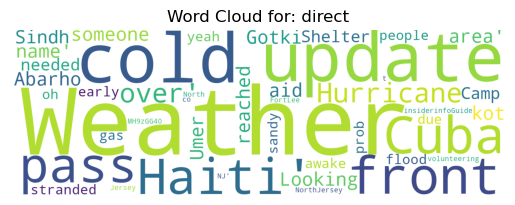

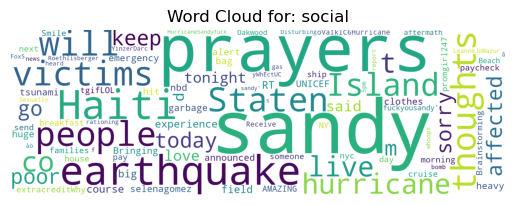

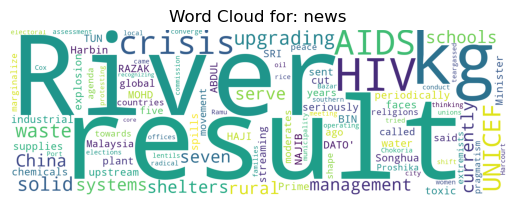

In [126]:
dataframes = {}
for i in genre:
    subset = df[df['genre'] == i]
    dataframes[i] = subset

texts={}
for key, dataframe in dataframes.items():
    text = dataframe['message'].values
    wordcloud = wc.generate(str(text))
    plt.imshow(wordcloud)
    plt.title('Word Cloud for: ' + key)
    plt.axis("off")
    plt.show()
    